In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt 
import random as rd
import numpy as np

Model 1: Deep-Wide

In [3]:
""""""

"""def widedeep(Xtrain):
    input_ = keras.layers.Input(shape=Xtrain.shape[1:])
    hidden1 = keras.layers.Dense(30,activation="relu")(input_)
    hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
    concat = keras.layers.Concatenate()([input_,hidden2])
    output = keras.layers.Dense(1)(concat)
    model = keras.Model(inputs=[input_],outputs=[output])
    return model
"""

In [43]:
from sklearn.datasets import fetch_california_housing
housingdata = fetch_california_housing()
sser = StandardScaler()
X = sser.fit_transform(housingdata.data,housingdata.target)
X_train_full,X_test,y_train_full,y_test = train_test_split(X,housingdata.target,test_size=0.25)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.25)

In [78]:
# Prep Directory for TensorBoard
import os
root_logdir = os.path.join(os.curdir,"my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)
run_logdir = get_run_logdir()

Epoch 1/1000
363/363 [==============================] - 1s 2ms/step - loss: 1.2825 - val_loss: 0.5589
Epoch 2/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4719 - val_loss: 0.4355
Epoch 3/1000
363/363 [==============================] - 1s 1ms/step - loss: 0.4044 - val_loss: 0.3995
Epoch 4/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.3795 - val_loss: 0.3823
Epoch 5/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.3705 - val_loss: 0.3638
Epoch 6/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.3610 - val_loss: 0.3536
Epoch 7/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.3526 - val_loss: 0.3597
Epoch 8/1000
363/363 [==============================] - 1s 1ms/step - loss: 0.3456 - val_loss: 0.3737
Epoch 9/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.3411 - val_loss: 0.3727
Epoch 10/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.336

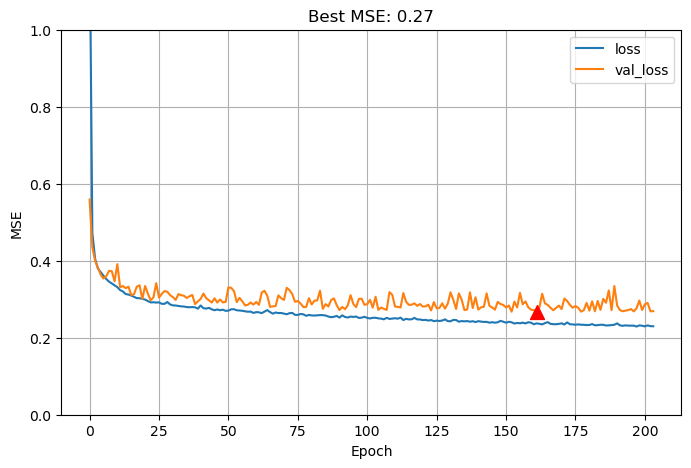

In [79]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model1 = keras.Model(inputs=[input_],outputs=[output])

model1.compile(loss="mean_squared_error",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
# weights,biases = nnm.layers[1].get_weights()

checkpoint_cb = keras.callbacks.ModelCheckpoint("./model_logs/my_best_keras_model1.h5",monitor= "val_loss",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_loss",patience=42,restore_best_weights=True)
tensorboad_cb = keras.callbacks.TensorBoard(run_logdir)
history1 = model1.fit(X_train,y_train,epochs=1000,
                      callbacks=[checkpoint_cb,early_stopping_cb,tensorboad_cb],
                      validation_data=(X_valid,y_valid)
                      )

best_model = keras.models.load_model("./model_logs/my_best_keras_model1.h5")
min_index, min_value = min(enumerate(history1.history["val_loss"]), key=lambda x: x[1])
mse_best = best_model.evaluate(X_test,y_test)

pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.scatter(min_index, min_value, marker='^', color='red',s=100,zorder=10)
best_epoch = ...  # Specify the epoch you want to mark
best_mse = ...  # Specify the MSE value at that epoch
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title(f"Best MSE: {round(mse_best,2)}")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()


Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7672 - val_loss: 0.5447
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4898 - val_loss: 0.4852
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4697 - val_loss: 0.4712
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4508 - val_loss: 0.4763
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4338 - val_loss: 0.4513
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4257 - val_loss: 0.4513
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4265 - val_loss: 0.4372
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4065 - val_loss: 0.4296
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3998 - val_loss: 0.4153
Epoch 10/10
162/162 [==============================] - 0s 875us/step - loss: 0.4290
0.42900121212005

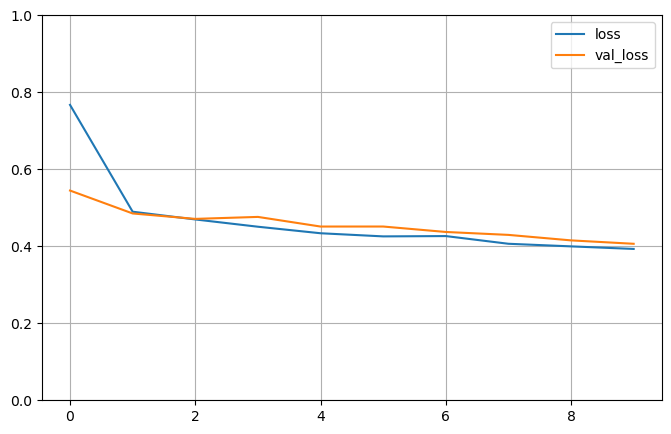

In [35]:
"""Model 2: Deep-Wide Multiple-Input"""
"""Requires two entry matrices X"""

input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")

hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)

concat = keras.layers.Concatenate()([input_A,hidden2])
output = keras.layers.Dense(1,name="outpout")(concat)

model2 = keras.Model(inputs=[input_A,input_B],outputs=[output])

model2.compile(loss="mean_squared_error",optimizer="sgd")

X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]

history2 = model2.fit((X_train_A, X_train_B),y_train,epochs=10,batch_size=32,validation_data=((X_valid_A, X_valid_B),y_valid))
mse_test = model2.evaluate((X_test_A, X_test_B),y_test)
print(mse_test)
y_pred2 = model2.predict((X_test_A, X_test_B))

pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
"""Model 3: Deep-Wide Multiple-Input & Multiple-Output"""
"""Requires two entry matrices X"""

input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")

hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)

concat = keras.layers.Concatenate()([input_A,hidden2])
output = keras.layers.Dense(1,name="main_outpout")(concat)
aux_output = keras.layers.Dense(1,name="aux_output")(hidden2)
model3 = keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])

model3.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer="sgd")

history3 = model3.fit(
    [X_train_A,X_train_B],[y_train,y_train], epochs=20,
    validation_data=((X_valid_A, X_valid_B),(y_valid,y_valid))
)
total_loss, main_loss, aux_loss = model3.evaluate([X_test_A,X_test_B],[y_test,y_test])
print("total_loss, main_loss, aux_loss",total_loss, main_loss, aux_loss)

pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8464 - main_outpout_loss: 0.7386 - aux_output_loss: 1.8169 - val_loss: 0.6364 - val_main_outpout_loss: 0.5564 - val_aux_output_loss: 1.3566
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5644 - main_outpout_loss: 0.4994 - aux_output_loss: 1.1496 - val_loss: 0.5651 - val_main_outpout_loss: 0.5047 - val_aux_output_loss: 1.1086
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5518 - main_outpout_loss: 0.5021 - aux_output_loss: 0.9994 - val_loss: 0.5385 - val_main_outpout_loss: 0.4915 - val_aux_output_loss: 0.9618
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5060 - main_outpout_loss: 0.4643 - aux_output_loss: 0.8816 - val_loss: 0.5146 - val_main_outpout_loss: 0.4764 - val_aux_output_loss: 0.8580
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4930 - main_outpout_loss: 0.4591 - aux_output_loss: 0.7987 -

In [29]:
class WideAndDeepModel(keras.Model):
    def __init__(self,units=30,activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units,activation=activation)
        self.hidden2 = keras.layers.Dense(units,activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self,inputs):
        input_A,input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.Concatenate()([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output,aux_output

model4 = WideAndDeepModel()
model4.compile(loss=["mse"],optimizer="sgd")
model4.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_valid,y_valid))

Epoch 1/50


OperatorNotAllowedInGraphError: in user code:

    File "c:\Users\MaxB2\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\MaxB2\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\MaxB2\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\MaxB2\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\MaxB2\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    OperatorNotAllowedInGraphError: Exception encountered when calling layer "wide_and_deep_model" "                 f"(type WideAndDeepModel).
    
    in user code:
    
        File "C:\Users\MaxB2\AppData\Local\Temp\ipykernel_10128\3272881141.py", line 9, in call  *
            input_A,input_B = inputs
    
        OperatorNotAllowedInGraphError: Iterating over a symbolic `tf.Tensor` is not allowed: AutoGraph did convert this function. This might indicate you are trying to use an unsupported feature.
    
    
    Call arguments received by layer "wide_and_deep_model" "                 f"(type WideAndDeepModel):
      • inputs=tf.Tensor(shape=(None, 8), dtype=float32)


In [38]:
model1.save("keras_model_1.h5")
model2.save("keras_model_2.h5")
model3.save("keras_model_3.h5")
# model_loaded = keras.models.load_model("keras_model_3.h5")

In [40]:
"""Callbacks"""
from sklearn.datasets import fetch_california_housing
housingdata = fetch_california_housing()
sser = StandardScaler()
X = sser.fit_transform(housingdata.data,housingdata.target)
X_train_full,X_test,y_train_full,y_test = train_test_split(X,housingdata.target,test_size=0.25)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.25)




Epoch 1/10
363/363 [==============================] - 0s 911us/step - loss: 1.3333
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 921.9713
Epoch 3/10
363/363 [==============================] - 0s 897us/step - loss: 203602165760.0000
Epoch 4/10
363/363 [==============================] - 0s 918us/step - loss: 684207552.0000
Epoch 5/10
363/363 [==============================] - 0s 911us/step - loss: 136991584.0000
Epoch 6/10
363/363 [==============================] - 0s 902us/step - loss: 800926208.0000
Epoch 7/10
363/363 [==============================] - 0s 903us/step - loss: 466129190912.0000
Epoch 8/10
363/363 [==============================] - 0s 902us/step - loss: 3134291705856.0000
Epoch 9/10
363/363 [==============================] - 0s 946us/step - loss: 219872713768960.0000
Epoch 10/10
363/363 [==============================] - 0s 894us/step - loss: 14249379711942656.0000


OSError: No file or directory found at my_best_keras_model1.h5